In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import imaplib
import os
import email
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
# import db_manager
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gmail-25k-mails/data.csv


In [19]:
DATASET_PATH = '/kaggle/input/gmail-25k-mails/data.csv'

In [20]:
df = pd.read_csv(DATASET_PATH)

In [21]:
df.head()

Unnamed: 0          email_id  \
0           0  1767b8741f281a93   
1           1  1767b6f2ce19bc20   
2           2  1767b5f3ff5bfebc   
3           3  1767b57a9085b161   
4           4  1767b55f93f027b7   

                                             subject  \
0  Quickstart was granted access to your Google A...   
1  So many ways to wear. ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ...   
2  Spend less. Gift better. New gift arrivals eve...   
3  Ivory Ella &amp; Vintage Louis Vuitton Zulily ...   
4  Take An Extra 50% Off Leather Styles &amp; 45%...   

                                             content  cluster  
0  UXVpY2tzdGFydCB3YXMgZ3JhbnRlZCBhY2Nlc3MgdG8geW...        0  
1  PCFET0NUWVBFIGh0bWw-DQo8aHRtbD4NCjxoZWFkPg0KPG...        0  
2  U3BlbmQgbGVzcy4gR2lmdCBiZXR0ZXIuIE5ldyBnaWZ0IG...        0  
3  SXZvcnkgRWxsYSAmYW1wOyBWaW50YWdlIExvdWlzIFZ1aX...        0  
4  VGFrZSBBbiBFeHRyYSA1MCUgT2ZmIExlYXRoZXIgU3R5bG...        0

In [22]:
df.shape

(25152, 5)

In [23]:
import base64


def decode(text):
    if type(text) == float:
        print(text)
        return text
    text = base64.urlsafe_b64decode(text).decode('utf-8')
    return text

In [24]:
df['content'].isna().sum()

322

In [25]:
df[df['content'].isna()]

Unnamed: 0          email_id subject content  cluster
432           432  1764ea25f1f3ec52     NaN     NaN        0
499           499  17648d09072bdc54     NaN     NaN        0
1168         1168  1760f5b88d9052da     NaN     NaN        0
1170         1170  1760f5ad7d5e514e     NaN     NaN        0
2868         2868  17551e0bb8f6422a     NaN     NaN        0
...           ...               ...     ...     ...      ...
25115       25115  14166b6ae3051455     NaN     NaN        0
25116       25116  14166afe1e1909fa     NaN     NaN        0
25125       25125  14146753c7128590     NaN     NaN        0
25126       25126  141452b90a7b9a7a     NaN     NaN        0
25128       25128  14130a3fa09f69ef     NaN     NaN        0

[322 rows x 5 columns]

In [26]:
df = df.dropna()

In [27]:
df['content'] = df['content'].apply(lambda content: decode(content))

In [28]:
df.head()

Unnamed: 0          email_id  \
0           0  1767b8741f281a93   
1           1  1767b6f2ce19bc20   
2           2  1767b5f3ff5bfebc   
3           3  1767b57a9085b161   
4           4  1767b55f93f027b7   

                                             subject  \
0  Quickstart was granted access to your Google A...   
1  So many ways to wear. ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ...   
2  Spend less. Gift better. New gift arrivals eve...   
3  Ivory Ella &amp; Vintage Louis Vuitton Zulily ...   
4  Take An Extra 50% Off Leather Styles &amp; 45%...   

                                             content  cluster  
0  Quickstart was granted access to your Google A...        0  
1  <!DOCTYPE html>\r\n<html>\r\n<head>\r\n<meta n...        0  
2  Spend less. Gift better. New gift arrivals eve...        0  
3  Ivory Ella &amp; Vintage Louis Vuitton Zulily ...        0  
4  Take An Extra 50% Off Leather Styles &amp; 45%...        0

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [30]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [41]:
def clean_text(text):    
    soup = BeautifulSoup(str(text), "html.parser")
    text = BeautifulSoup(str(text), "lxml").get_text()
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    tokens = [word.lower() for word in tokens]
    text = [word for word in tokens if word not in stopword]
    text = [word for word in text if word not in soup.find_all()]    
    text = [word for word in text if len(word) > 1]
    return text


In [42]:
df['content_clean'] = df['content'].apply(lambda x: clean_text(x))

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://www.umassd.edu/media/umassdartmouth/international-student-scholar-center/Reduced_Course_Load_form.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://github.com/reficul31/paging-segmentation-implementation" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://umassdartmouth.co1.qualtrics.com/jfe/form/SV_1SVdXmMkzWIG4nP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the 

In [43]:
df[['content','content_clean']].head()

content  \
0  Quickstart was granted access to your Google A...   
1  <!DOCTYPE html>\r\n<html>\r\n<head>\r\n<meta n...   
2  Spend less. Gift better. New gift arrivals eve...   
3  Ivory Ella &amp; Vintage Louis Vuitton Zulily ...   
4  Take An Extra 50% Off Leather Styles &amp; 45%...   

                                       content_clean  
0  [quickstart, granted, access, google, account,...  
1  [many, ways, wear, many, ways, wear, fitted, c...  
2  [spend, less, gift, better, new, gift, arrival...  
3  [ivory, ella, vintage, louis, vuitton, zulily,...  
4  [take, extra, 50, leather, styles, 45, everyth...

In [44]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 

In [45]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [46]:
data_matrix=vectorizer.fit_transform(df['content'])
print("\n Feature names Identified :\n")
# print(vectorizer.get_feature_names())

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://www.umassd.edu/media/umassdartmouth/international-student-scholar-center/Reduced_Course_Load_form.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://github.com/reficul31/paging-segmentation-implementation" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://umassdartmouth.co1.qualtrics.com/jfe/form/SV_1SVdXmMkzWIG4nP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the 


 Feature names Identified :



In [47]:
data_matrix.shape

(24825, 31841)

In [48]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


In [ ]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) + " "+ str(km.inertia_) +"processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [49]:
sosd = sosd = [23542.951894150814, 23059.380773174715, 22424.870788335138, 22129.546673745972, 21830.770858077685, 21578.370049054854, 21311.647671075774, 21030.150933727342, 20873.554919545124, 20616.472193318747, 20464.85935679597, 20144.82024520302, 19965.16320729652, 19696.66564837986, 19655.87657260472, 19597.29884347444, 19430.277394255194, 19296.550894227512, 19297.76044186584, 18977.667625714163, 18844.31185890742, 18844.98940477962, 18734.90069500305, 18575.961969725668, 18507.86776699416, 18474.455327046995, 18353.74662045552, 18264.796422872936, 18122.97434281815, 18102.667479772823, 18106.468317812298, 18008.24035278338, 17899.48372501551, 17766.641732953307, 17815.261743750143, 17787.078464869235, 17661.632251723593, 17589.77108779797, 17529.768368414912, 17479.89012230955, 17444.730220273515, 17421.955391484447, 17396.855908715337, 17343.908955135124, 17232.209001307547, 17258.687042832236, 17040.584112131906, 17182.40416600837, 17032.54644678149, 17014.078259989372, 16980.23211998651, 16943.165546525473, 16868.329109723298, 16933.251152248682, 16776.116551436044, 16707.526576398584, 16652.18736023274, 16708.04327057215, 16727.246587301648, 16723.755331744167, 16567.104264815116, 16530.715545065967, 16560.038173938832, 16501.300690435575, 16655.00070200388, 16395.09792913706, 16425.075340128675, 16583.438762216418, 16337.427010132727, 16303.088699537017, 16348.4375179432, 16321.994217511234, 16251.377861204699, 16250.869739786272, 16157.931512881562, 16165.2808543928, 16166.77952065131, 16091.489211674221, 16143.16149018295, 16056.818566438316, 15999.00673012131, 15900.791810032017, 15998.698203850816, 16044.580040671772, 15933.709012448926, 15925.279358766367, 15867.26922535373, 15936.969593645535, 15830.026342130048, 15780.53315382577, 15733.168601830112, 15775.148007069454, 15970.749017174732, 15847.96681636262, 15779.056145042876, 15709.59366927383, 15679.86612513757, 15630.29526309244, 15598.15729450057, 15598.608123842116, 15586.502828128721, 15808.949640873145, 15525.03303902304, 15488.524372529628, 15520.164648642014, 15513.787960982774, 15481.916779443076, 15883.755845229398, 15424.030838457018, 15399.787593880721, 15350.02638813229, 15713.860589818683, 15358.646976345126, 15361.337339066282, 15294.78843672775, 15254.880992397639, 15322.848089399622, 15270.162743814253, 15565.159499830872, 15314.17295130316, 15620.450389878193, 15631.060343014684, 15263.480694848264, 15480.723703169304, 15090.178133666022, 15373.661785127953, 15099.34914887959, 15414.241685962339, 15372.880405843822, 15373.784772377177, 15019.539434727003, 15005.843110514494, 15159.579676277921, 14976.23624486372, 15358.675173839365, 15332.800117670795, 15335.07348885515, 15275.699931588559, 14900.17085498662, 14880.723947494238, 14911.979843564592, 15156.439733336623, 14789.286231026093, 15148.663326370906, 15287.32091450528, 14931.84812293834, 15190.63730869437, 15149.972546161958, 15148.105108223812, 15105.374649274649, 15135.540196919423, 14726.770763666127, 15134.102247250641, 14693.05324486298, 15119.326418261482, 14689.169512119512, 15104.87579366093, 15022.261053564866, 14965.299776887154, 15008.910090392455, 14608.0604388129, 15108.17767347285, 14978.372334744989, 14978.919491102932, 15009.416170970984, 14877.61747365479, 14868.73968451318, 14983.840616202906, 14885.88669080631, 14849.103049701145, 14479.897131900998, 14803.834316319297, 14931.63332792947, 14869.098063123833, 14854.034718343837, 14820.807991529953, 14820.49343094393, 14765.951670995386, 14725.513306098206, 14668.233622903692, 14735.629921811575, 14467.071921328125, 14727.909587439539, 14727.649200048862, 14776.373686232037, 14678.983801200613, 14614.561320969022, 14731.10916104896, 14682.012374510687, 14680.16539745487, 14659.763519230375, 14322.233380345377, 14595.933589819826, 14616.702250241995, 14484.23883261489, 14226.799557128017, 14600.44104073551, 14668.702684887905, 14660.379877400817, 14544.334380605787, 14520.785522778959, 14526.11269296964, 14588.87033367746, 14523.547836202026, 14136.563906073545, 14506.629058288641, 14406.868474980254, 14559.941488709197, 14443.564906609707, 14589.316558154638, 14063.532989723266, 14493.448023227946, 14095.96131312458, 14436.806019632304, 14326.507606728066, 14417.978953752, 14499.217034135676, 14490.2173493804, 14455.864168097278, 14377.732471724034, 14388.858829504567, 14381.449831335403, 14352.79405410453, 14356.314377889525, 14315.442847917035, 14345.855434119576, 14265.4645805244, 14269.775005075842, 14266.901385326788, 14357.20038696335, 14311.496039034251, 14310.981275450167, 14341.230373359014, 14257.894206868765, 14267.21010354925, 14260.091211385727, 14281.955646558381, 14153.856861835497, 14219.115526340807, 14213.682375543223, 14263.249008611458, 14161.88248110116, 13811.30908810696, 13790.646826609885, 14238.047116875357, 14146.368302634075, 14242.318305495983, 14002.576429645915, 14166.915981728029, 14203.360840539332, 14166.215298145373, 14185.926427234252, 14068.010631640136, 14052.92490520051, 14081.560753855272, 14116.755969302787, 14142.101045428602, 14083.741399036859, 14049.416830796043, 14133.271439544496, 14041.631087074842, 14061.974739095864, 14029.77381844842, 14052.490089517854, 14073.080335067649, 13941.004649648376, 14005.944777397408, 14008.300020051545, 14080.534857837267, 13959.60759590455, 14032.564729530346, 13972.79181552828, 13965.692799097344, 13919.227852511765, 13958.36350520153, 13969.084828617166, 13889.129960553542, 13933.181406729962, 13917.48430111395, 13926.918738077888, 13908.995225590752, 13900.34752516958, 13853.509267895153, 13828.680045458348, 13930.304938129948, 13878.69118498132, 13883.000209059084, 13884.44508171803, 13810.306008250775, 13853.28400099365, 13851.31396817237, 13864.992078097952, 13898.097440214353, 13798.882132293578, 13852.744999678871, 13840.314887704211, 13851.28311706158, 13780.131584214312, 13828.31377401041, 13697.624192640767, 13803.175164613069, 13791.110356620824, 13765.936620485505, 13805.481978345448, 13773.992344918663, 13763.718338476961, 13739.97792580954, 13651.03941768585, 13738.325027206636, 13717.762574425591, 13743.074564551478, 13674.048595140805, 13730.458037375698, 13638.478283982447, 13679.551923872381, 13698.684194199652, 13654.178195514154, 13661.74447865625, 13639.76481079462, 13637.80126037555, 13644.640235853041, 13643.324106762317, 13631.3667919496, 13601.104262158071, 13646.27452744193, 13505.903414909162, 13603.392719996698, 13613.590808304523, 13617.554181595855, 13604.503412770386, 13477.180200092349, 13599.517041779915, 13483.861460026963, 13567.716230490569, 13563.67466339201, 13519.951204028372, 13495.98029714241, 13599.068041789073]

In [50]:
len(sosd)

338

In [51]:

K = range(2,340)

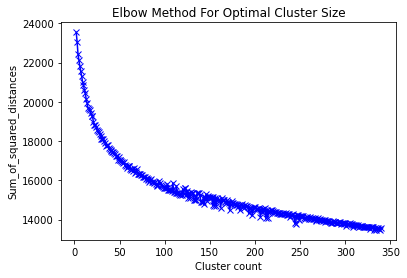

In [52]:
#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(list(K), sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [53]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=100).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_

In [54]:
df['cluster'] = clusters

In [55]:
df[df['cluster'] == 0]

Unnamed: 0          email_id  \
2               2  1767b5f3ff5bfebc   
5               5  1767b2840db928e9   
11             11  1767afcea21c5cdf   
17             17  1767ac488c5ac6d9   
22             22  17678dc18064404e   
...           ...               ...   
25147       25147  13edf09ec1eec41d   
25148       25148  13edf09610485c9a   
25149       25149  13edf085981e36be   
25150       25150  13edf0858296f0f3   
25151       25151  13edf08577fca80c   

                                                 subject  \
2      Spend less. Gift better. New gift arrivals eve...   
5      Stories for Asfina Vayani. Machine Learning Ba...   
11     CARDHOLDER APPRECIATION! Get $10 off $50+ this...   
17     Cozy up in our new aromatic candles. ‌ ‌ ‌ ‌ ‌...   
22     We found 14 fresh ideas for you We found some ...   
...                                                  ...   
25147  Dear: ASFINA VAYANI Thanks for showing your in...   
25148  Welcome to Google+, asfina! Share with the peo...   
25149  To spice up your inbox with colors and themes,...   
25150  Access Gmail on your mobile phone The days of ...   
25151  4 things you need to know Gmail is a little bi...   

                                                 content  cluster  \
2      Spend less. Gift better. New gift arrivals eve...        0   
5      Stories for Asfina Vayani. Machine Learning Ba...        0   
11     CARDHOLDER APPRECIATION! Get $10 off $50+ this...        0   
17     Cozy up in our new aromatic candles. ‌ ‌ ‌ ‌ ‌...        0   
22     We found 14 fresh ideas for you We found some ...        0   
...                                                  ...      ...   
25147  Dear: ASFINA  VAYANI  Thanks for showing your ...        0   
25148  Welcome to Google+, asfina! Share with the peo...        0   
25149  To spice up your inbox with colors and themes,...        0   
25150  Access Gmail on your mobile phone The days of ...        0   
25151  4 things you need to know Gmail is a little bi...        0   

                                           content_clean  
2      [spend, less, gift, better, new, gift, arrival...  
5      [stories, asfina, vayani, machine, learning, b...  
11         [cardholder, appreciation, get, 10, 50, week]  
17                        [cozy, new, aromatic, candles]  
22     [found, 14, fresh, ideas, found, fresh, pins, ...  
...                                                  ...  
25147  [dear, asfina, vayani, thanks, showing, intere...  
25148  [welcome, google, asfina, share, people, care,...  
25149  [spice, inbox, colors, themes, check, themes, ...  
25150  [access, gmail, mobile, phone, days, needing, ...  
25151  [things, need, know, gmail, little, bit, diffe...  

[4916 rows x 6 columns]

Text(0, 0.5, 'Number of emails')

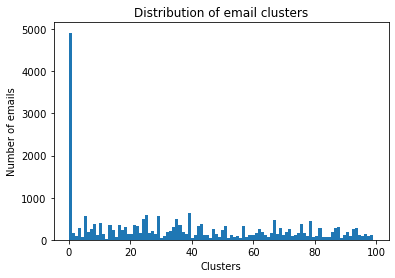

In [56]:
df['cluster'].plot(kind='hist', bins=100)
plt.title('Distribution of email clusters')
plt.xlabel('Clusters')
plt.ylabel('Number of emails')

In [57]:
df['content_str'] = df['content'].apply(lambda x: str(clean_text(x)))

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://www.umassd.edu/media/umassdartmouth/international-student-scholar-center/Reduced_Course_Load_form.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://github.com/reficul31/paging-segmentation-implementation" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  markup
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:398: UserWarning: "https://cs.nyu.edu/courses/spring06/V22.0310-001/hw3.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and fee


Group :  0 
-------------------


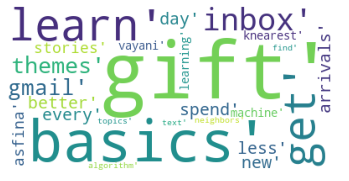


Group :  1 
-------------------


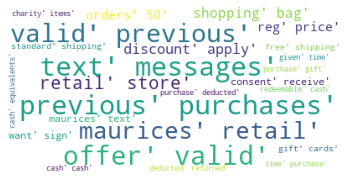


Group :  2 
-------------------


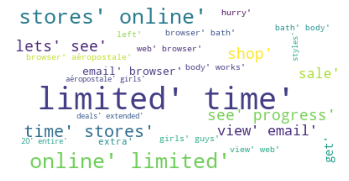


Group :  3 
-------------------


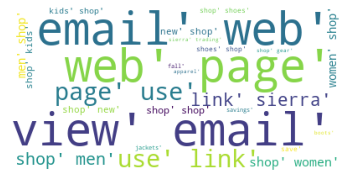


Group :  4 
-------------------


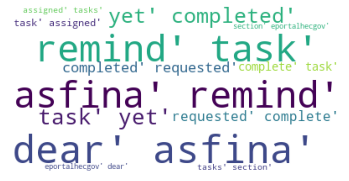


Group :  5 
-------------------


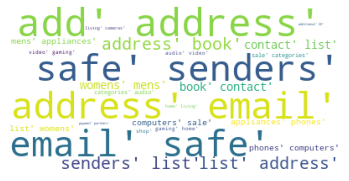


Group :  6 
-------------------


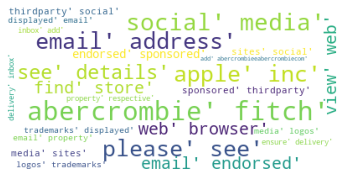


Group :  7 
-------------------


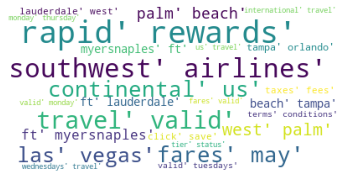


Group :  8 
-------------------


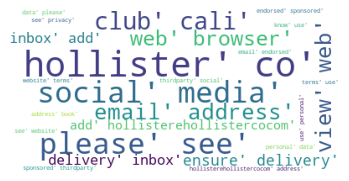


Group :  9 
-------------------


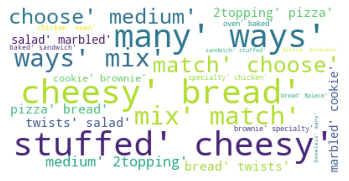


Group :  10 
-------------------


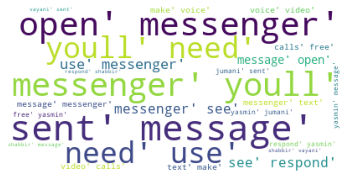


Group :  11 
-------------------


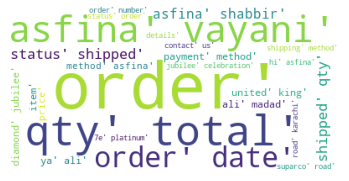


Group :  12 
-------------------


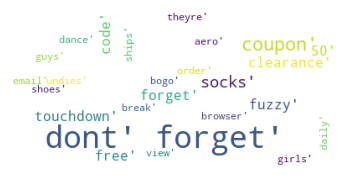


Group :  13 
-------------------


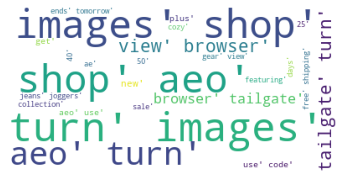


Group :  14 
-------------------


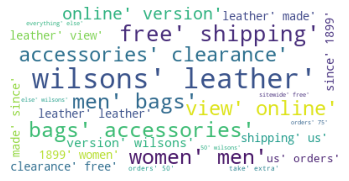


Group :  15 
-------------------


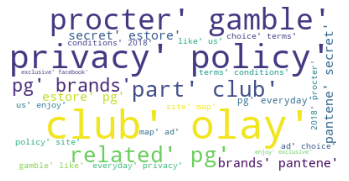


Group :  16 
-------------------


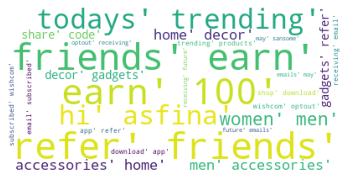


Group :  17 
-------------------


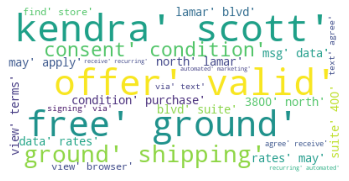


Group :  18 
-------------------


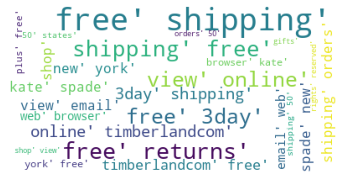


Group :  19 
-------------------


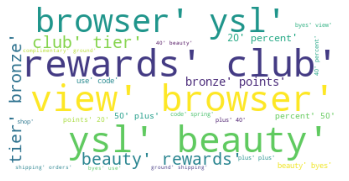


Group :  20 
-------------------


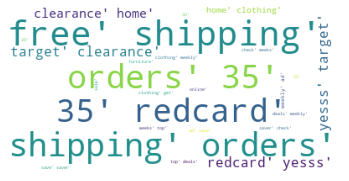


Group :  21 
-------------------


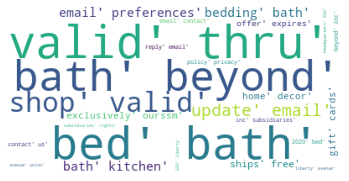


Group :  22 
-------------------


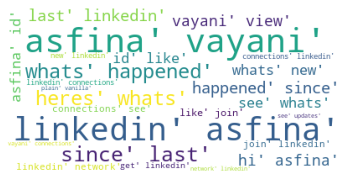


Group :  23 
-------------------


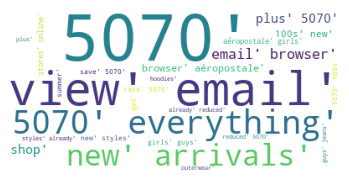


Group :  24 
-------------------


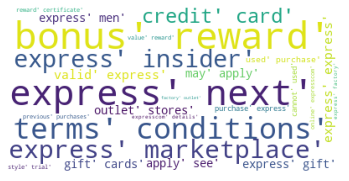


Group :  25 
-------------------


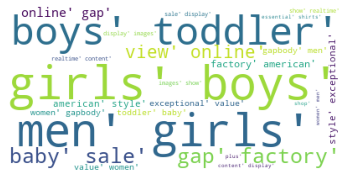


Group :  26 
-------------------


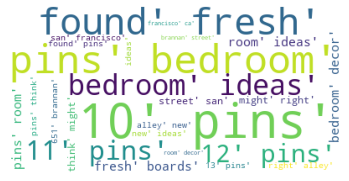


Group :  27 
-------------------


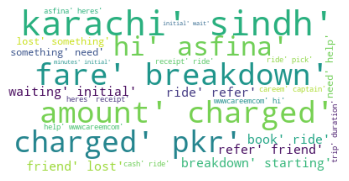


Group :  28 
-------------------


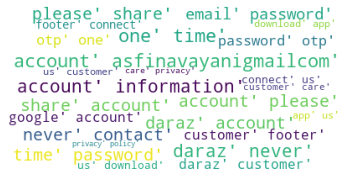


Group :  29 
-------------------


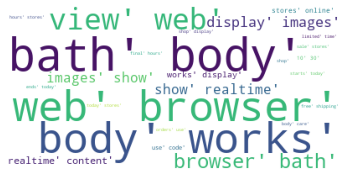


Group :  30 
-------------------


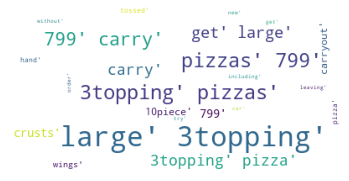


Group :  31 
-------------------


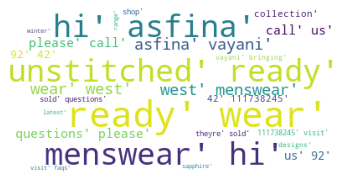


Group :  32 
-------------------


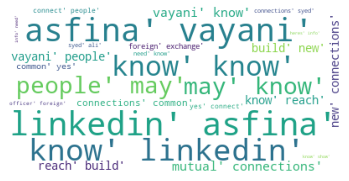


Group :  33 
-------------------


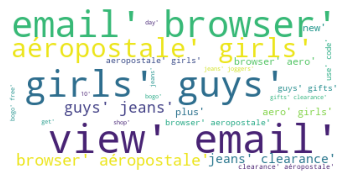


Group :  34 
-------------------


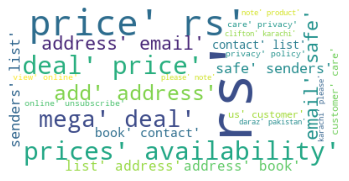


Group :  35 
-------------------


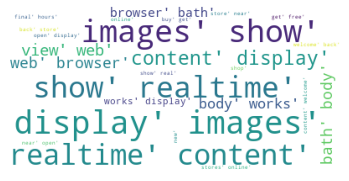


Group :  36 
-------------------


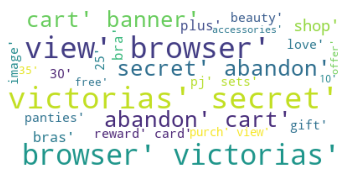


Group :  37 
-------------------


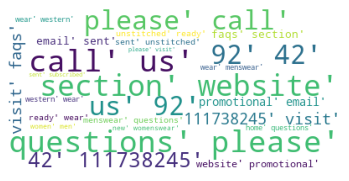


Group :  38 
-------------------


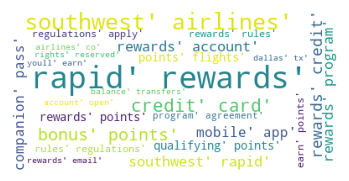


Group :  39 
-------------------


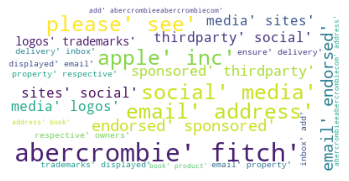


Group :  40 
-------------------


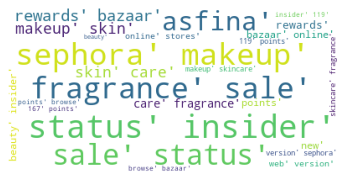


Group :  41 
-------------------


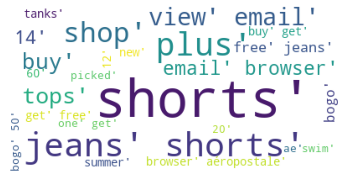


Group :  42 
-------------------


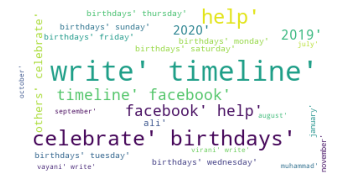


Group :  43 
-------------------


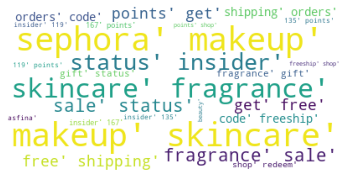


Group :  44 
-------------------


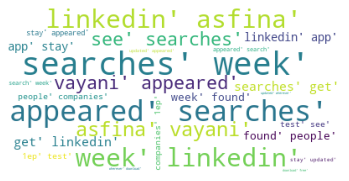


Group :  45 
-------------------


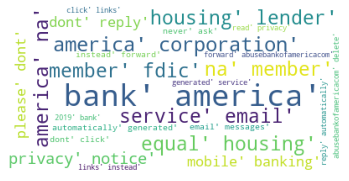


Group :  46 
-------------------


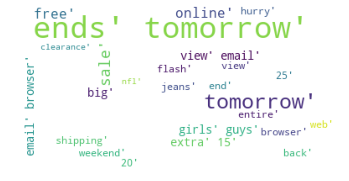


Group :  47 
-------------------


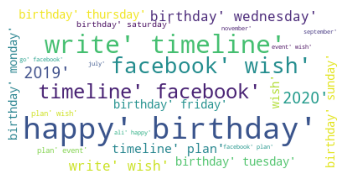


Group :  48 
-------------------


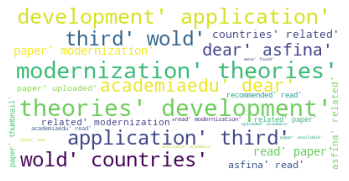


Group :  49 
-------------------


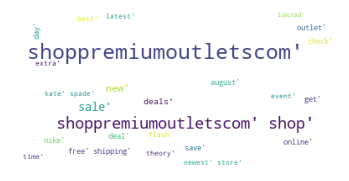


Group :  50 
-------------------


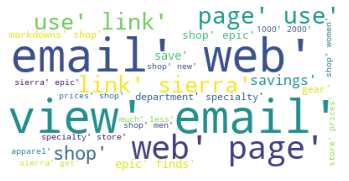


Group :  51 
-------------------


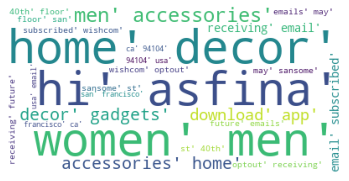


Group :  52 
-------------------


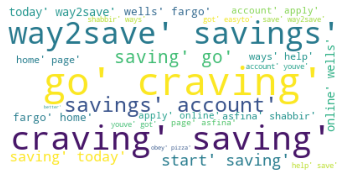


Group :  53 
-------------------


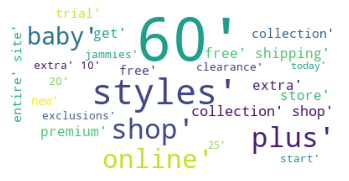


Group :  54 
-------------------


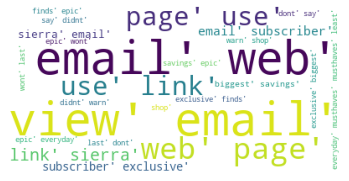


Group :  55 
-------------------


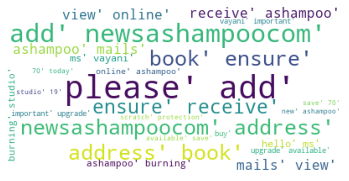


Group :  56 
-------------------


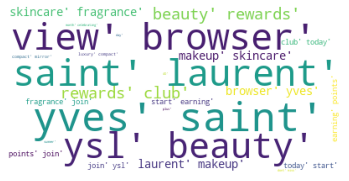


Group :  57 
-------------------


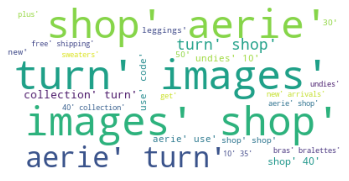


Group :  58 
-------------------


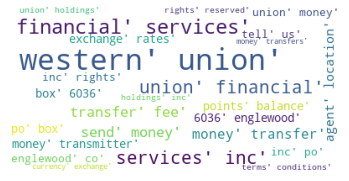


Group :  59 
-------------------


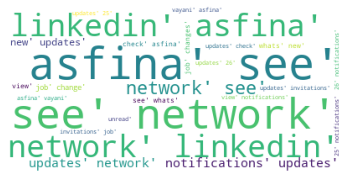


Group :  60 
-------------------


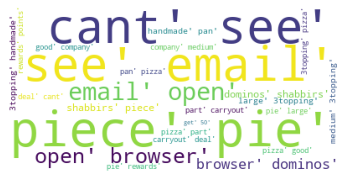


Group :  61 
-------------------


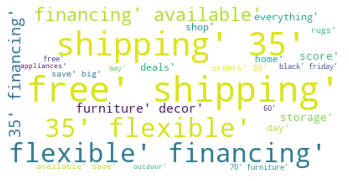


Group :  62 
-------------------


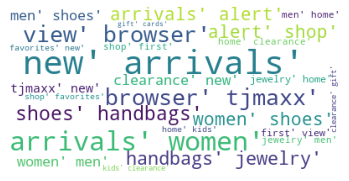


Group :  63 
-------------------


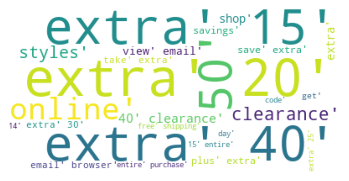


Group :  64 
-------------------


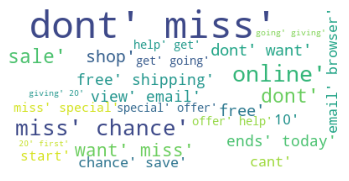


Group :  65 
-------------------


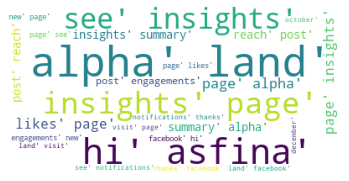


Group :  66 
-------------------


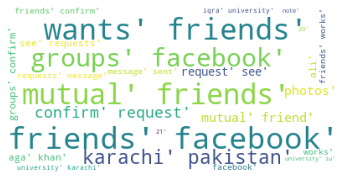


Group :  67 
-------------------


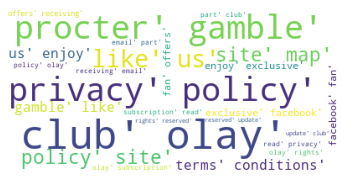


Group :  68 
-------------------


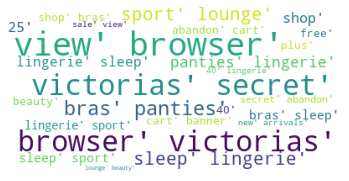


Group :  69 
-------------------


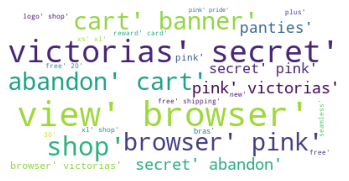


Group :  70 
-------------------


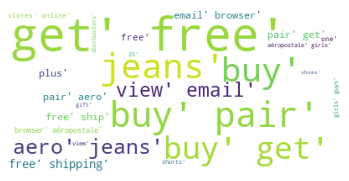


Group :  71 
-------------------


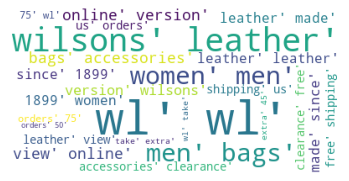


Group :  72 
-------------------


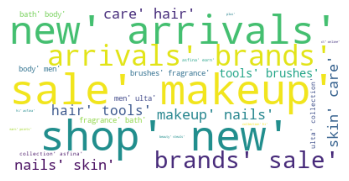


Group :  73 
-------------------


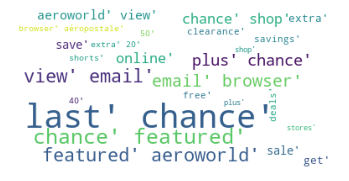


Group :  74 
-------------------


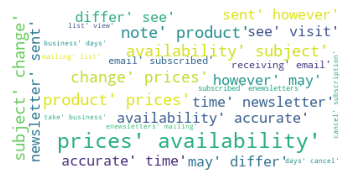


Group :  75 
-------------------


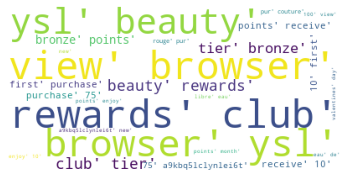


Group :  76 
-------------------


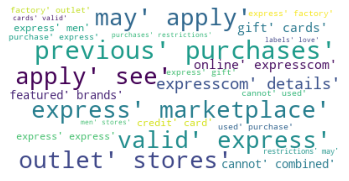


Group :  77 
-------------------


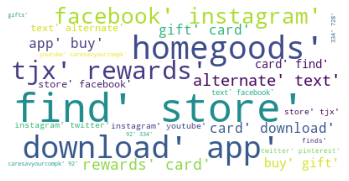


Group :  78 
-------------------


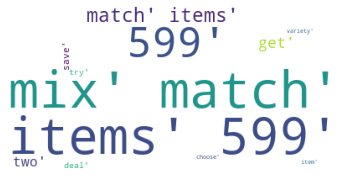


Group :  79 
-------------------


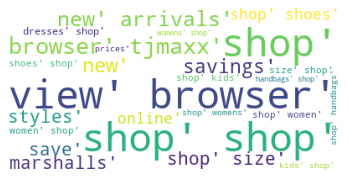


Group :  80 
-------------------


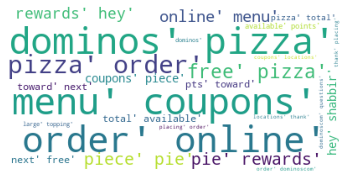


Group :  81 
-------------------


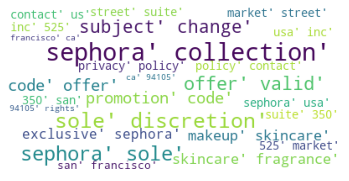


Group :  82 
-------------------


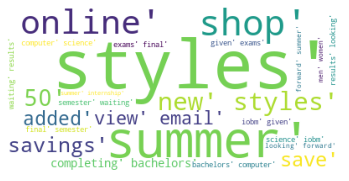


Group :  83 
-------------------


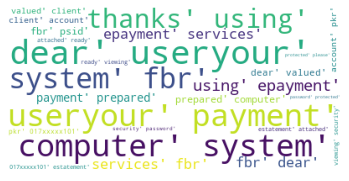


Group :  84 
-------------------


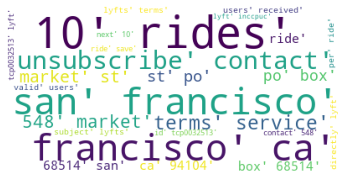


Group :  85 
-------------------


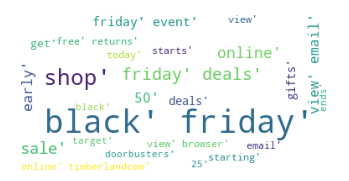


Group :  86 
-------------------


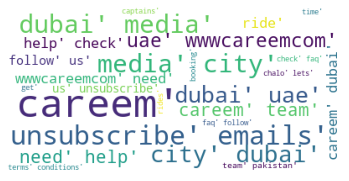


Group :  87 
-------------------


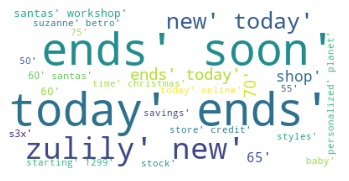


Group :  88 
-------------------


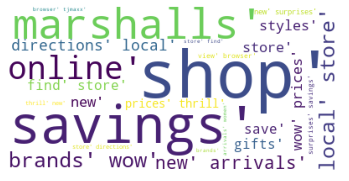


Group :  89 
-------------------


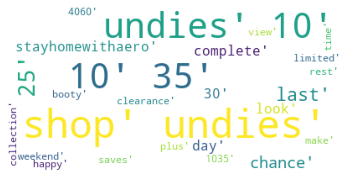


Group :  90 
-------------------


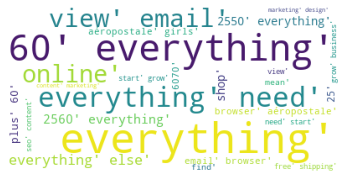


Group :  91 
-------------------


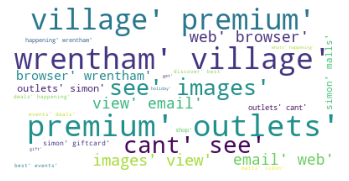


Group :  92 
-------------------


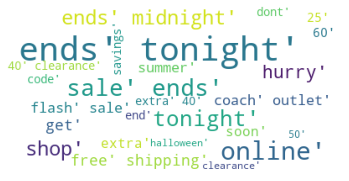


Group :  93 
-------------------


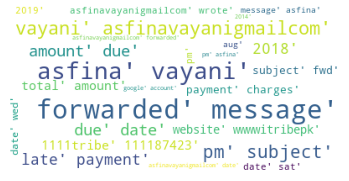


Group :  94 
-------------------


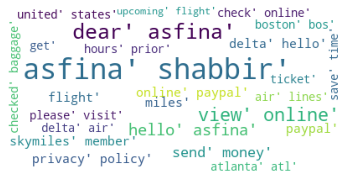


Group :  95 
-------------------


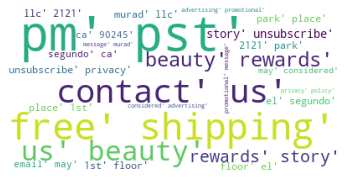


Group :  96 
-------------------


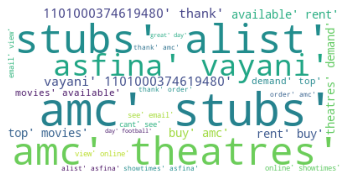


Group :  97 
-------------------


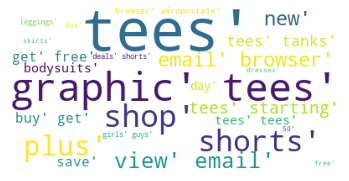


Group :  98 
-------------------


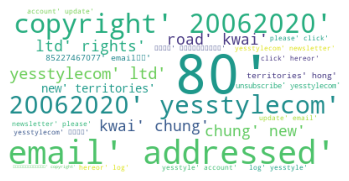


Group :  99 
-------------------


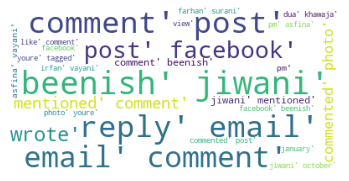

In [58]:
#Print cluster label and Courses under each cluster
from wordcloud import WordCloud
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(str(df[df['cluster'] == group]['content_str'].values))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [65]:
custom_data = ["recover from google"]

custom_matrix=vectorizer.transform(custom_data)


In [66]:
custom_matrix.shape

(1, 31841)

In [67]:
a = kmeans.predict(custom_matrix)

In [68]:
a

array([0], dtype=int32)

In [69]:
df[df['cluster'] == a[0]]

Unnamed: 0          email_id  \
2               2  1767b5f3ff5bfebc   
5               5  1767b2840db928e9   
11             11  1767afcea21c5cdf   
17             17  1767ac488c5ac6d9   
22             22  17678dc18064404e   
...           ...               ...   
25147       25147  13edf09ec1eec41d   
25148       25148  13edf09610485c9a   
25149       25149  13edf085981e36be   
25150       25150  13edf0858296f0f3   
25151       25151  13edf08577fca80c   

                                                 subject  \
2      Spend less. Gift better. New gift arrivals eve...   
5      Stories for Asfina Vayani. Machine Learning Ba...   
11     CARDHOLDER APPRECIATION! Get $10 off $50+ this...   
17     Cozy up in our new aromatic candles. ‌ ‌ ‌ ‌ ‌...   
22     We found 14 fresh ideas for you We found some ...   
...                                                  ...   
25147  Dear: ASFINA VAYANI Thanks for showing your in...   
25148  Welcome to Google+, asfina! Share with the peo...   
25149  To spice up your inbox with colors and themes,...   
25150  Access Gmail on your mobile phone The days of ...   
25151  4 things you need to know Gmail is a little bi...   

                                                 content  cluster  \
2      Spend less. Gift better. New gift arrivals eve...        0   
5      Stories for Asfina Vayani. Machine Learning Ba...        0   
11     CARDHOLDER APPRECIATION! Get $10 off $50+ this...        0   
17     Cozy up in our new aromatic candles. ‌ ‌ ‌ ‌ ‌...        0   
22     We found 14 fresh ideas for you We found some ...        0   
...                                                  ...      ...   
25147  Dear: ASFINA  VAYANI  Thanks for showing your ...        0   
25148  Welcome to Google+, asfina! Share with the peo...        0   
25149  To spice up your inbox with colors and themes,...        0   
25150  Access Gmail on your mobile phone The days of ...        0   
25151  4 things you need to know Gmail is a little bi...        0   

                                           content_clean  \
2      [spend, less, gift, better, new, gift, arrival...   
5      [stories, asfina, vayani, machine, learning, b...   
11         [cardholder, appreciation, get, 10, 50, week]   
17                        [cozy, new, aromatic, candles]   
22     [found, 14, fresh, ideas, found, fresh, pins, ...   
...                                                  ...   
25147  [dear, asfina, vayani, thanks, showing, intere...   
25148  [welcome, google, asfina, share, people, care,...   
25149  [spice, inbox, colors, themes, check, themes, ...   
25150  [access, gmail, mobile, phone, days, needing, ...   
25151  [things, need, know, gmail, little, bit, diffe...   

                                             content_str  
2      ['spend', 'less', 'gift', 'better', 'new', 'gi...  
5      ['stories', 'asfina', 'vayani', 'machine', 'le...  
11     ['cardholder', 'appreciation', 'get', '10', '5...  
17                ['cozy', 'new', 'aromatic', 'candles']  
22     ['found', '14', 'fresh', 'ideas', 'found', 'fr...  
...                                                  ...  
25147  ['dear', 'asfina', 'vayani', 'thanks', 'showin...  
25148  ['welcome', 'google', 'asfina', 'share', 'peop...  
25149  ['spice', 'inbox', 'colors', 'themes', 'check'...  
25150  ['access', 'gmail', 'mobile', 'phone', 'days',...  
25151  ['things', 'need', 'know', 'gmail', 'little', ...  

[4916 rows x 7 columns]

In [71]:
df[df['cluster'] ==5].head(100)

Unnamed: 0          email_id  \
21813       21813  1670ddefe1eaba9b   
21917       21917  166c4f1d155a7504   
21923       21923  166bf6333271c717   
21950       21950  166af5fd8da17f60   
21966       21966  166a5d711216e494   
...           ...               ...   
22780       22780  16460358d244f38d   
22786       22786  1645c57d9539dee5   
22789       22789  1645a5873cbf5cdd   
22792       22792  16455eaeaceda5ac   
22796       22796  16450c25d5dd80fd   

                                                 subject  \
21813  Add Our Address to Your Email Safe Senders Lis...   
21917  We have some special vouchers on your favorite...   
21923  We have some special vouchers on your favorite...   
21950  Get additional up to 15% OFF on Meezan Bank De...   
21966  Up to 60% OFF on groceries, beauty, snacks &am...   
...                                                  ...   
22780  Enjoy additional up to 20% off with our paymen...   
22786  Enjoy additional up to 20% off with our paymen...   
22789  Enjoy additional up to 20% off with our paymen...   
22792  We&#39;ve got some special deals for you insid...   
22796  We&#39;ve got some special deals for you insid...   

                                                 content  cluster  \
21813  <!--Header Logo-->\r\n    <!DOCTYPE html PUBLI...        5   
21917  We have some special vouchers on your favorite...        5   
21923  We have some special vouchers on your favorite...        5   
21950  Get additional up to 15% OFF on Meezan Bank De...        5   
21966  Up to 60% OFF on groceries, beauty, snacks &am...        5   
...                                                  ...      ...   
22780  Enjoy additional up to 20% off with our paymen...        5   
22786  Enjoy additional up to 20% off with our paymen...        5   
22789  Enjoy additional up to 20% off with our paymen...        5   
22792  We&#39;ve got some special deals for you insid...        5   
22796  We&#39;ve got some special deals for you insid...        5   

                                           content_clean  \
21813  [add, address, email, safe, senders, list, add...   
21917  [special, vouchers, favorite, brands, add, add...   
21923  [special, vouchers, favorite, brands, add, add...   
21950  [get, additional, 15, meezan, bank, debit, car...   
21966  [60, groceries, beauty, snacks, add, address, ...   
...                                                  ...   
22780  [enjoy, additional, 20, payment, partners, add...   
22786  [enjoy, additional, 20, payment, partners, add...   
22789  [enjoy, additional, 20, payment, partners, add...   
22792  [weve, got, special, deals, inside, add, addre...   
22796  [weve, got, special, deals, inside, add, addre...   

                                             content_str  
21813  ['add', 'address', 'email', 'safe', 'senders',...  
21917  ['special', 'vouchers', 'favorite', 'brands', ...  
21923  ['special', 'vouchers', 'favorite', 'brands', ...  
21950  ['get', 'additional', '15', 'meezan', 'bank', ...  
21966  ['60', 'groceries', 'beauty', 'snacks', 'add',...  
...                                                  ...  
22780  ['enjoy', 'additional', '20', 'payment', 'part...  
22786  ['enjoy', 'additional', '20', 'payment', 'part...  
22789  ['enjoy', 'additional', '20', 'payment', 'part...  
22792  ['weve', 'got', 'special', 'deals', 'inside', ...  
22796  ['weve', 'got', 'special', 'deals', 'inside', ...  

[100 rows x 7 columns]

In [72]:
import pickle

In [73]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf.pickle", "wb"))